# Installing packages to Google Colab

In [ ]:
!pip install onnxmltools
!pip install onnxconverter-common
!pip install mtcnn
!pip install onnxruntime --upgrade
!pip install segmentation-models
!pip install keras-utils
!pip install api-utils
!pip install tf2onnx
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 w

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=92507068d11a94848ad4c22fe0ac7cf88c0a8b2fb3e39e5bb57867ae8255456c
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/c6/6e/e45e92ad8d7328bf3fbbb1347f8e7fa652e39722075269a99231752eb1c2/api-utils-2019.9.18-3.tar.gz (from

# Importing Necessary Packages

In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import History, EarlyStopping, ModelCheckpoint, CSVLogger

import shutil
import re
import pandas as pd
import random
from skimage import img_as_uint, img_as_float, exposure, draw
import skimage.io as io
import copy
from datetime import datetime
import onnxmltools
from mtcnn import MTCNN
import segmentation_models as sm
import matplotlib.patches as patches
import os
import tensorflow as tf

import tf2onnx
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.pyplot as plt
import onnxruntime as ort


Segmentation Models: using `tf.keras` framework.


# Connectting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def safe_make_folder(i):
    """
    Creates a folder if it does not already exist.

    :param i: Path to the folder to be created.
    """
    if not os.path.exists(i):
        os.makedirs(i)

# Pre-processing and Training

This section introduces the CustomGenerator class, a custom implementation of tf.keras.utils.Sequence designed to handle data loading and preprocessing during model training and validation. The generator reads images and corresponding labels from the *samples.csv* file, processes the images, and generates batches for training.

Key features of the CustomGenerator include data augmentation with optional transformations to enhance training diversity,
facial detection using MTCNN to focus on facial regions and it
loads data in batches for training.

1 Physical GPUs, 1 Logical GPUs


Shape do batch X: (4, 256, 256, 3), Shape do batch y: (4, 3)
Valores RGB de y[0]: [0.6745098  0.49803922 0.39607844]


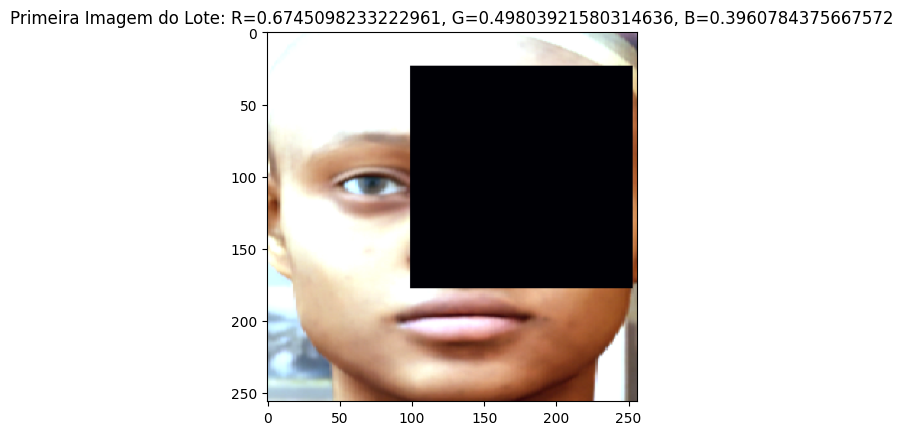

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 256, 256, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 256, 256, 3)          0         ['normalization_2[0][0]'

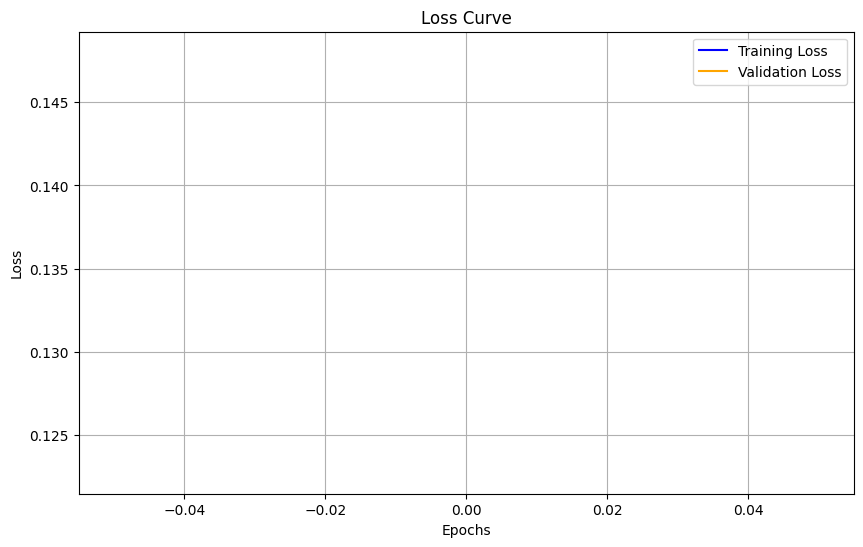

Inspecting the weights of the first layer...
Layer 2: normalization_2
Weights Shape: (3,)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo ONNX salvo em: /content/drive/MyDrive/data/results/training/execution_2024_12_02_23_39_20_PM/model.onnx


In [ ]:
class CustomGenerator(tf.keras.utils.Sequence):
    """
    Custom data generator for training a model with skin tone data.

    :param csv_filename: Path to the CSV file containing metadata.
    :param image_folder: Path to the folder containing images.
    :param split: Dataset split to use ('train', 'validation', etc.).
    :param input_size: Desired input size of the images as a tuple (height, width).
    :param batch_size: Number of samples per batch.
    :param shuffle: Whether to shuffle the data at the end of each epoch.
    :param use_augmentation: Whether to apply data augmentation.
    """

    def __init__(self, csv_filename, image_folder, split="train", input_size=(256,256), batch_size=4, shuffle=False, use_augmentation=False):
        self.input_size = input_size
        self.batch_size = batch_size
        raw_df = pd.read_csv(csv_filename)
        self.main_df = raw_df[raw_df['split'] == split]
        self.filenames = list(self.main_df['filename'])
        self.rs = list(self.main_df['r'])
        self.gs = list(self.main_df['g'])
        self.bs = list(self.main_df['b'])
        self.image_folder = image_folder
        self.shuffle = shuffle
        self.use_augmentation = use_augmentation
        self.n_samples = len(self.filenames)
        self.indexes = np.arange(self.n_samples)
        if self.shuffle:
            np.random.shuffle(self.indexes)
        self.detector = MTCNN()  # Inicializa o MTCNN para detecção de rosto
        self.on_epoch_end()

    def on_epoch_end(self):
        """
        Updates the indexes after each epoch. If shuffle is enabled, shuffles the data.
        """
        self.indexes = np.arange(self.n_samples)
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def hide_random_patch(self, img):
        """
        Applies a random black square to the image for data augmentation.

        :param img: Input image as a NumPy array.
        :return: Image with a random patch hidden.
        """
        height, width, _ = img.shape

        # Define o tamanho máximo do quadrado (por exemplo, 30% da menor dimensão da imagem)
        max_square_size = int(0.7 * min(height, width))
        min_square_size = int(0.6 * min(height, width))  # Tamanho mínimo para o quadrado

        # Gera o tamanho aleatório do quadrado
        square_size = np.random.randint(min_square_size, max_square_size)

        # Define a posição aleatória para o quadrado
        top_left_x = np.random.randint(0, width - square_size)
        top_left_y = np.random.randint(0, height - square_size)

        # Adiciona o quadrado preto
        img[top_left_y:top_left_y + square_size, top_left_x:top_left_x + square_size] = 0
        return img

    def __len__(self):
        """
        Returns the number of batches per epoch.

        :return: Number of batches as an integer.
        """
        return int(np.ceil(self.n_samples / self.batch_size))

    def normalize_image(self, img):
        """
        Normalizes the image to zero mean and unit variance.

        :param img: Input image as a NumPy array.
        :return: Normalized image.
        """
        img_mean = np.mean(img, axis=(0, 1), keepdims=True)
        img_std = np.std(img, axis=(0, 1), keepdims=True)
        img_normalized = (img - img_mean) / (img_std + 1e-8)  # Add small value to avoid division by zero
        return img_normalized

    def augment_data(self, img):
        """
        Applies data augmentation to the image.

        :param img: Input image as a NumPy array.
        :return: Augmented image.
        """
        transform_parameters = self.image_datagen.get_random_transform(img_shape=img.shape)
        t_img = self.image_datagen.apply_transform(img, transform_parameters)
        return t_img

    def resize_data(self, img):
        """
        Resizes the image to the specified input size.

        :param img: Input image as a NumPy array.
        :return: Resized image.
        """
        size = (self.input_size[1], self.input_size[0])
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)
        return resized_img

    def get_face_coords_MTCNN(self, img):
        """
        Detects faces in the image using MTCNN and returns face coordinates.

        :param img: Input image as a NumPy array.
        :return: Face coordinates as (x1, y1, x2, y2).
        """
        faces = self.detector.detect_faces(img)
        if len(faces) > 0:
            x, y, w, h = faces[0]['box']
            return x, y, x+w, y+h  # Coordenadas do rosto (x1, y1, x2, y2)
        return None, None, None, None

    def extract_skin_region(self, img):
        """
        Extracts the skin region from the image using HSV color space.

        :param img: Input image as a NumPy array.
        :return: Skin region of the image.
        """
        # Ensure the image is in uint8 format
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)

        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)  # Convert to HSV
        lower_skin = np.array([0, 20, 70], dtype=np.uint8)
        upper_skin = np.array([20, 255, 255], dtype=np.uint8)
        mask = cv2.inRange(hsv, lower_skin, upper_skin)  # Create skin mask
        skin_region = cv2.bitwise_and(img, img, mask=mask)  # Apply mask to the image
        return skin_region

    def get_raw_batch_data(self, current_indexes):
        """
        Loads raw image data for a batch.

        :param current_indexes: Indexes of the samples in the current batch.
        :return: List of raw images.
        """
        images = []
        for i in range(len(current_indexes)):
            img_path = os.path.join(self.image_folder, self.filenames[current_indexes[i]])
            img = io.imread(img_path)
            if img is None:
                print(f"Erro ao carregar a imagem {img_path}")
                continue

            if img.shape[-1] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

            x1, y1, x2, y2 = self.get_face_coords_MTCNN(img)
            if x1 is not None:
                face = img[y1:y2, x1:x2]
                resized_face = self.resize_data(face)
                images.append(resized_face)
            else:
                resized_img = self.resize_data(img)
                images.append(resized_img)
        return images

    def __data_generation(self, current_indexes):
        """
        Generates a batch of data and applies necessary transformations.

        :param current_indexes: Indexes of the samples in the current batch.
        :return: Tuple of (X, y) where X is the input batch and y is the target batch.
        """
        current_batch_size = len(current_indexes)
        raw_images = self.get_raw_batch_data(current_indexes)

        X = np.zeros((current_batch_size, self.input_size[0], self.input_size[1], 3), dtype=np.float32)
        y = np.zeros((current_batch_size, 3), dtype=np.float32)

        for i, img in enumerate(raw_images):
            img = self.hide_random_patch(img)

            if self.use_augmentation:
                img = self.augment_data(img)
            img = self.resize_data(img)
            img = self.normalize_image(img)

            X[i,:,:,:] = img

            # Usa diretamente os valores de r, g, b do CSV
            y[i, 0] = self.rs[i] / 255.0
            y[i, 1] = self.gs[i] / 255.0
            y[i, 2] = self.bs[i] / 255.0

        return X, y

    def __getitem__(self, index):
        """
        Generates a batch of data.

        :param index: Batch index.
        :return: Tuple of (X, y) where X is the input batch and y is the target batch.
        """
        current_indexes = [self.indexes[(index * self.batch_size + i) % len(self.indexes)] for i in range(self.batch_size)]
        X, y = self.__data_generation(current_indexes)
        return X, y

    def __call__(self):
        for i in self.indexes:
            yield self.__getitem__(i)

def plot_loss_curve(history):
    """
    Plots the training and validation loss curves.

    :param history: History object returned by the `fit` method of a Keras model,
                    containing the training and validation metrics for each epoch.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def visualize_first_layer_weights(model):
    """
    Visualizes the weights of the first layer in the provided model.

    :param model: Keras model object whose weights are to be visualized.
    :return: Weights of the first layer, or None if no weights are found.
    """
    for i, layer in enumerate(model.layers):
        weights = layer.get_weights()
        if len(weights) > 0:
            print(f"Layer {i}: {layer.name}")
            if len(weights) == 2:
                weights, biases = weights
                print("Weights Shape:", weights.shape)
                print("Biases Shape:", biases.shape)
            else:
                weights = weights[0]
                print("Weights Shape:", weights.shape)
            return weights
    print("No layers with weights found.")
    return None

def penalized_mse_loss(y_true, y_pred):
    """
    Computes a custom mean squared error (MSE) loss with a penalty for predictions
    close to the dataset mean.

    :param y_true: Ground truth target values as a tensor.
    :param y_pred: Predicted target values as a tensor.
    :return: Penalized MSE loss value.
    """
    dataset_mean = tf.constant([0.66302684, 0.51205787, 0.43841614], dtype=tf.float32)

    # Standard MSE loss
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)

    # Calculate the distance from the dataset mean (penalize when closer to the mean)
    mean_distance = tf.reduce_mean(tf.square(y_pred - dataset_mean), axis=-1)

    # Penalize if the prediction is close to the dataset mean
    penalty = tf.maximum(0.0, 1.0 - mean_distance)  # Penalizes small distances to the mean

    # Total loss is a combination of MSE and the penalty (inverted penalty)
    return mse_loss + 0.1 * penalty  # Adjust the penalty weight as needed



def main():
    """
    Main function for configuring and training the model.

    - Configures GPU usage for training.
    - Initializes training and validation data generators.
    - Compiles and trains a Keras model using EfficientNet as the base.
    - Saves the trained model in both Keras and ONNX formats.
    """
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            if len(gpus) > 1:
                tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            print(e)

    sm.set_framework('tf.keras')
    sm.framework()

    execution_name = "execution_" + datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%p")
    training_results_folder = "/content/drive/MyDrive/data/results/training/" + execution_name
    safe_make_folder(training_results_folder)

    dataset_folder = "/content/drive/MyDrive/data/datasets/trust"
    image_folder = os.path.join(dataset_folder, "image")
    csv_filename = os.path.join(dataset_folder, "samples.csv")

    train_generator = CustomGenerator(csv_filename, image_folder, split="train", shuffle=True, use_augmentation=False)
    validation_generator = CustomGenerator(csv_filename, image_folder, split="validation", shuffle=False, use_augmentation=False)

    X_batch, y_batch = train_generator[0]
    print(f"Shape do batch X: {X_batch.shape}, Shape do batch y: {y_batch.shape}")
    print(f"Valores RGB de y[0]: {y_batch[0]}")

    plt.imshow((X_batch[0] + 1.0) / 2.0)
    plt.title(f"Primeira Imagem do Lote: R={y_batch[0][0]}, G={y_batch[0][1]}, B={y_batch[0][2]}")
    plt.show()

    base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(3, activation='linear')(x)  # Change to 'linear' for regression

    model = Model(inputs=base_model.input, outputs=output)
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=penalized_mse_loss, metrics=['mean_absolute_error', 'mean_squared_error'])

    model.summary()

    early_stop = EarlyStopping(monitor='val_loss', patience=30)
    model_checkpoint = ModelCheckpoint(os.path.join(training_results_folder, '.weights.h5'), save_weights_only=True, save_best_only=True, mode='auto')
    csv_logger = CSVLogger(os.path.join(training_results_folder, 'history.csv'))
    callbacks_list = [early_stop, model_checkpoint, csv_logger]

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=50,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=callbacks_list,
        shuffle=True,
        verbose=1
    )

    # Plot Loss Curve
    print("Plotting the loss curve...")
    plot_loss_curve(history)

    # Inspect First Layer Weights
    print("Inspecting the weights of the first layer...")
    weights = visualize_first_layer_weights(model)

    model.load_weights(os.path.join(training_results_folder, '.weights.h5'))
    model.save(os.path.join(training_results_folder, 'model.h5'))

    spec = (tf.TensorSpec((None, 256, 256, 3), tf.float32),)
    output_path = os.path.join(training_results_folder, "model.onnx")
    model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)
    print(f"Modelo ONNX salvo em: {output_path}")

if __name__ == '__main__':
    main()



# Evaluation and Validation

This section demonstrates how to use a pre-trained ONNX model to predict skin tones from images stored in the drive. The function processes each image by resizing, normalizing, and performing inference to obtain the predicted RGB values. For visualization, the original image is displayed alongside a color patch representing the predicted skin tone. All results are saved to a designated folder in your drive for easy reference.

In [ ]:
def evaluation():
    """
    Evaluates the model on the validation dataset, generating predictions and visualizing results.

    This function loads a pre-trained ONNX model from the drive, processes the validation dataset to extract skin regions,
    and performs inference. It saves the results along with visualizations comparing ground truth and predicted
    skin tones.

    ! ATENTION !
    change the variable:
    - modelSaved
    to the name of the folder containing the model you wish to evaluate.

    :return: None. Saves visualizations and evaluation results to the drive at drive > MyDrive > data > results > inference_test > (last folder available)
    """
    modelSaved = "execution_2024_11_30_21_22_42_PM"
    model = ort.InferenceSession('/content/drive/MyDrive/data/results/training/'+modelSaved+'/model.onnx', providers=['CUDAExecutionProvider']) #loading model
    model_input_name = model.get_inputs()[0].name #getting input name for the model
    model.run(None, {model_input_name: np.zeros((1,256,256,3),dtype=np.float32)})

    execution_name = "execution_"+datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%p")
    res_path = os.path.join('/content/drive/MyDrive/data/results/inference_test', execution_name)
    pred_vis_path = os.path.join(res_path, 'pred_vis')
    safe_make_folder(res_path)
    safe_make_folder(pred_vis_path)
    img_path = '/content/drive/MyDrive/data/datasets/trust/image'
    csv_filename = '/content/drive/MyDrive/data/datasets/trust/samples.csv'
    split = "validation"
    raw_df = pd.read_csv(csv_filename)
    main_df = raw_df[raw_df['split'] == split]

    for index, row in main_df.iterrows():
        full_filename = os.path.join(img_path, row['filename'])
        print(full_filename)
        img = io.imread(full_filename)
        if img.shape[2] > 3:
            img = img[:, :, :3]

        face_hsv = extract_skin_region(img)
        if face_hsv is None:
            print(f"No face detected in {row['filename']}")
            continue

        skin_hsv = face_hsv.reshape(-1, 3)
        centroid_hsv = get_HSV_centroid(skin_hsv)
        # Convert HSV centroid to RGB and expand to 256x256
        skin_rgb = cv2.cvtColor(np.uint8([[centroid_hsv]]), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0
        img_processed = np.tile(skin_rgb, (256, 256, 1))

        batch = img_processed.reshape((1, 256, 256, 3))
        batch_pred = model.run(None, {model_input_name: batch})[0]

        gt_r = row['r'] / 255.0
        gt_g = row['g'] / 255.0
        gt_b = row['b'] / 255.0

        pred_r = batch_pred[0, 0]
        pred_g = batch_pred[0, 1]
        pred_b = batch_pred[0, 2]

        fig, axs = plt.subplots(1, 3)
        axs[0].imshow(img)
        square_gt = patches.Rectangle((0.25, 0.25), 0.5, 0.5, linewidth=2, edgecolor='black', facecolor=(gt_r, gt_g, gt_b))
        axs[1].add_patch(square_gt)
        axs[1].set_xlim(0, 1)
        axs[1].set_ylim(0, 1)
        square_pred = patches.Rectangle((0.25, 0.25), 0.5, 0.5, linewidth=2, edgecolor='black', facecolor=(pred_r, pred_g, pred_b))
        axs[2].add_patch(square_pred)
        axs[2].set_xlim(0, 1)
        axs[2].set_ylim(0, 1)

        fig.savefig(os.path.join(pred_vis_path, row['filename']))
        plt.close(fig)


def predict_on_folder():
    """
    Predicts skin tone on all images in a specified folder using a pre-trained ONNX model.

    This function loads a model from the drive, processes each image in a specified folder, and generates visualizations
    for the predictions. It resizes images to (256, 256) and normalizes pixel values before inference.
    Results are saved to the drive, with visualizations showing the original image and the predicted skin tone.

    ! ATENTION !
    change the variable:
    - modelSaved
    to the name of the folder containing the model you wish to evaluate.

    :return: None. Saves visualizations and evaluation results to the drive at drive > MyDrive > data > results > inference_test > (last folder available)
    """
    modelSaved = "execution_2024_11_30_21_22_42_PM"
    model = ort.InferenceSession('/content/drive/MyDrive/data/results/training/'+modelSaved+'/model.onnx', providers=['CUDAExecutionProvider'])  # Load model
    model_input_name = model.get_inputs()[0].name  # Get input name for the model
    model.run(None, {model_input_name: np.zeros((1, 256, 256, 3), dtype=np.float32)})  # Initial dummy run to check model

    # Define result paths
    execution_name = "execution_" + datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%p")
    res_path = os.path.join('/content/drive/MyDrive/data/results/inference_test', execution_name)
    pred_vis_path = os.path.join(res_path, 'pred_vis')
    safe_make_folder(res_path)
    safe_make_folder(pred_vis_path)

    img_path = '/content/drive/MyDrive/data/datasets/real_from_internet'

    # Get all image files from the folder
    img_filenames = [f for f in os.listdir(img_path) if f.endswith('.png')]

    for i in range(len(img_filenames)):
        full_filename = os.path.join(img_path, img_filenames[i])
        print(f"Processing: {full_filename}")
        img = io.imread(full_filename)

        if img.shape[2] > 3:  # If image has an alpha channel, remove it
            img = img[:, :, :3]

        # Resize image to (256, 256)
        resized_img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)

        # Normalize image to [0, 1]
        img_normalized = resized_img / 255.0  # Assuming model was trained with images scaled to [0, 1]

        # Add batch dimension for the model input (1, 256, 256, 3)
        batch = np.expand_dims(img_normalized, axis=0).astype(np.float32)  # Convert to float32

        # Run the model inference
        batch_pred = model.run(None, {model_input_name: batch})[0]

        # Get the predicted RGB values
        pred_r = batch_pred[0, 0]
        pred_g = batch_pred[0, 1]
        pred_b = batch_pred[0, 2]

        # Visualize the result
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(img)  # Display original image
        square_pred = patches.Rectangle((0.25, 0.25), 0.5, 0.5, linewidth=2, edgecolor='black', facecolor=(pred_r, pred_g, pred_b))
        axs[1].add_patch(square_pred)
        axs[1].set_xlim(0, 1)
        axs[1].set_ylim(0, 1)

        # Save the visualization
        fig.savefig(os.path.join(pred_vis_path, img_filenames[i]))
        plt.close(fig)

if __name__ == '__main__':
    """
    Evaluate the model on the validation dataset.
    Run predictions on a folder of images.

    These functions can be commented out to be able to run either one, without having to necessarily run both.
    """
    evaluation()
    predict_on_folder()

/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000065_1.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000065_2.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000295_0.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000295_1.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000295_2.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000173_0.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000173_1.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000173_2.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000049_0.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000049_1.png
/content/drive/MyDrive/data/datasets/trust/image/ag_face_triplegangers_3_300_000049_2.png
/content/d

KeyboardInterrupt: 